Read in Wine Dataset, Inspect Data

In [143]:
import pandas as pd

# Define column names
wine_dataset_column_names = [
              'Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
              'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
              'Color_intensity',  'Hue', 'OD280_OD315_of_diluted_wines', 'Proline'
]

# Read in datasets
wine_dataset = pd.read_csv('./datasets/wine.data', header=None, names=wine_dataset_column_names)

# Inspect the data
print(wine_dataset.head())



   Class  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280_OD315_of_diluted_wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

# Split create features dataset and y label series

In [144]:
# Seperate training features and target variable
wine_X = wine_dataset.drop('Class', axis=1) # Drop whole target column from dataset and assign it to X
wine_y = wine_dataset['Class'] # Target variable

# Verify number of samples match
print(wine_X.shape)
print(wine_y.shape)



(178, 13)
(178,)


Perform ten fold cross volidation for Decision Tree for Wine Dataset

In [145]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier 
import numpy as np

# Initialize decision tree model 
wine_decision_tree = DecisionTreeClassifier(random_state=42)

# Map scoring metrics to actual scoring strings
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_weighted',
            'recall': 'recall_weighted' 
          }

# Perform ten fold cross validation using decision tree, scoring parameters tells waht metrics we want
wine_decision_tree_scores = cross_validate(wine_decision_tree, wine_X, wine_y, cv=10, scoring=scoring)

# Calculate and display mean and standard deviation of scores for decision tree
print(f"Accuracy: Mean = {np.mean(wine_decision_tree_scores['test_accuracy']):.3f}, Std = {np.std(wine_decision_tree_scores['test_accuracy']):.3f}")
print(f"Precision: Mean = {np.mean(wine_decision_tree_scores['test_precision']):.3f}, Std = {np.std(wine_decision_tree_scores['test_precision']):.3f}")
print(f"Recall: Mean = {np.mean(wine_decision_tree_scores['test_recall']):.3f}, Std = {np.std(wine_decision_tree_scores['test_recall']):.3f}")



Accuracy: Mean = 0.865, Std = 0.091
Precision: Mean = 0.889, Std = 0.069
Recall: Mean = 0.865, Std = 0.091


Perform ten fold cross validation for Naive Bayes for the Wine Dataset

In [146]:
from sklearn.naive_bayes import GaussianNB

# Initialize Naive Bayes model
wine_naive_bayes = GaussianNB()

# Perform ten-fold cross-validation using Naive Bayes
wine_naive_bayes_scores = cross_validate(wine_naive_bayes, wine_X, wine_y, cv=10, scoring=scoring)

# Calculate and display mean and standard deviation of scores for Naive Bayes
print(f"Accuracy: Mean = {np.mean(wine_naive_bayes_scores['test_accuracy']):.3f}, Std = {np.std(wine_naive_bayes_scores['test_accuracy']):.3f}")
print(f"Precision: Mean = {np.mean(wine_naive_bayes_scores['test_precision']):.3f}, Std = {np.std(wine_naive_bayes_scores['test_precision']):.3f}")
print(f"Recall: Mean = {np.mean(wine_naive_bayes_scores['test_recall']):.3f}, Std = {np.std(wine_naive_bayes_scores['test_recall']):.3f}")


Accuracy: Mean = 0.978, Std = 0.027
Precision: Mean = 0.981, Std = 0.023
Recall: Mean = 0.978, Std = 0.027


Perform ten fold cross validation for SVM for the Wine Dataset

In [147]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create SVM classifer
# Using standard scaling since SVMs are sensitive to unscaled data
wine_svm_classifier = make_pipeline(StandardScaler(), SVC(random_state=42))

wine_svm_classifier_scores = cross_validate(wine_svm_classifier, wine_X, wine_y, cv=10, scoring=scoring)

# Calculate and display mean and standard deviation of scores for Support Vector Machine Classifier
print(f"Accuracy: Mean = {np.mean(wine_svm_classifier_scores['test_accuracy']):.3f}, Std = {np.std(wine_svm_classifier_scores['test_accuracy']):.3f}")
print(f"Precision: Mean = {np.mean(wine_svm_classifier_scores['test_precision']):.3f}, Std = {np.std(wine_svm_classifier_scores['test_precision']):.3f}")
print(f"Recall: Mean = {np.mean(wine_svm_classifier_scores['test_recall']):.3f}, Std = {np.std(wine_svm_classifier_scores['test_recall']):.3f}")

Accuracy: Mean = 0.978, Std = 0.027
Precision: Mean = 0.981, Std = 0.024
Recall: Mean = 0.978, Std = 0.027


Extract range scores and means

In [148]:
# Define function to extract plotting values for each classifier

def extract_plotting_scores(scores):
    mean_accuracy = np.mean(scores['test_accuracy'])
    min_accuracy = np.min(scores['test_accuracy'])
    max_accuracy = np.max(scores['test_accuracy'])

    mean_precision = np.mean(scores['test_precision'])
    min_precision = np.min(scores['test_precision'])
    max_precision = np.max(scores['test_precision'])

    mean_recall = np.mean(scores['test_recall'])
    min_recall = np.min(scores['test_recall'])
    max_recall = np.max(scores['test_recall'])

    return { 
        'accuracy': (mean_accuracy, min_accuracy, max_accuracy),
        'precision': (mean_precision, min_precision, max_precision),
        'recall': (mean_recall, min_recall, max_recall)
    }

# Extract plotting scores for each classifier for wine dataset
wine_decision_tree_plotting_scores = extract_plotting_scores(wine_decision_tree_scores)
wine_naive_bayes_plotting_scores = extract_plotting_scores(wine_naive_bayes_scores)
wine_svm_classifier_plotting_scores = extract_plotting_scores(wine_svm_classifier_scores)


Store data in a format that is easily plotted

In [149]:
# Define classifiers for the y axis of the horizontal bar chart
classifiers = ['Decision Tree', 'Naive Bayes', 'SVM']

metrics = ['accuracy', 'precision', 'recall']

def format_data(decision_tree_plotting_scores, naive_bayes_plotting_scores, svm_classifier_plotting_scores):

    # Initialize dictionary for storage of plotting data.
    # Each metric is a nested dictionary with keys and values for both means and ranges.
    plotting_data = {metric: {'means': [], 'ranges': []} for metric in metrics}

    # Populate the dictionary with the extracted scores
    for plotting_scores in [decision_tree_plotting_scores, naive_bayes_plotting_scores, svm_classifier_plotting_scores]:
        for metric in metrics: 
            mean, min_val, max_val = plotting_scores[metric]
            plotting_data[metric]['means'].append(mean)
            plotting_data[metric]['ranges'].append((min_val, max_val))

    return plotting_data

wine_plotting_data = format_data(wine_decision_tree_plotting_scores, wine_naive_bayes_plotting_scores, wine_svm_classifier_plotting_scores)

print(wine_plotting_data)

{'accuracy': {'means': [0.865032679738562, 0.9777777777777779, 0.9777777777777779], 'ranges': [(0.6666666666666666, 1.0), (0.9444444444444444, 1.0), (0.9444444444444444, 1.0)]}, 'precision': {'means': [0.8890035273368607, 0.9810185185185185, 0.9807870370370371], 'ranges': [(0.7430555555555556, 1.0), (0.9513888888888888, 1.0), (0.9513888888888888, 1.0)]}, 'recall': {'means': [0.865032679738562, 0.9777777777777779, 0.9777777777777779], 'ranges': [(0.6666666666666666, 1.0), (0.9444444444444444, 1.0), (0.9444444444444444, 1.0)]}}


Create and display a plot for each metric

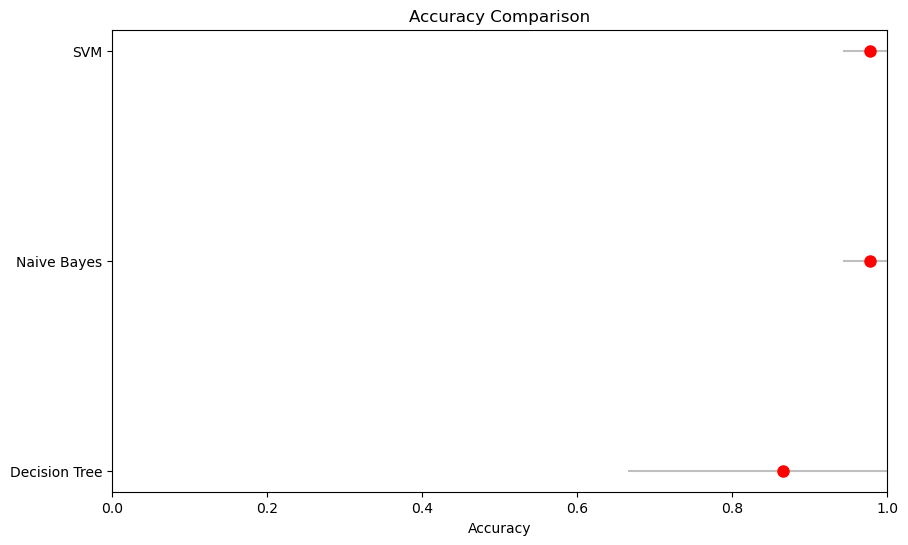

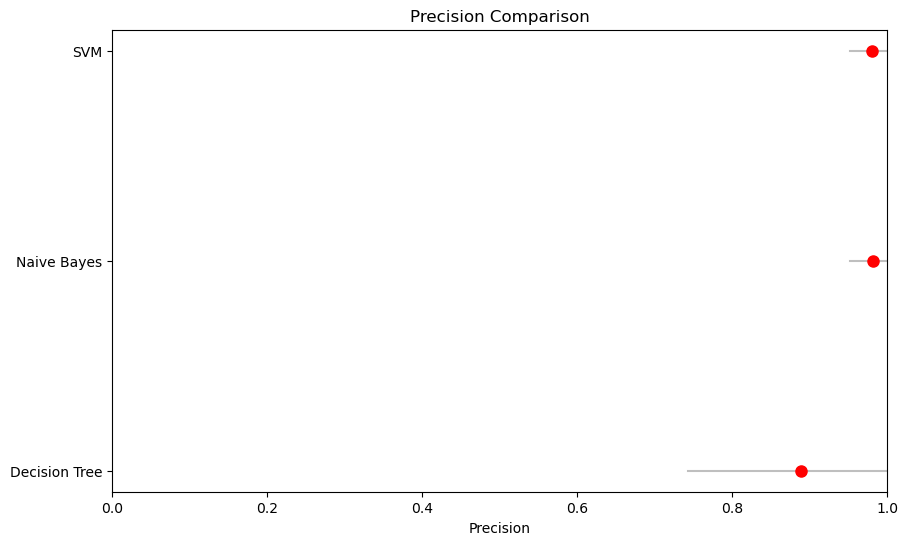

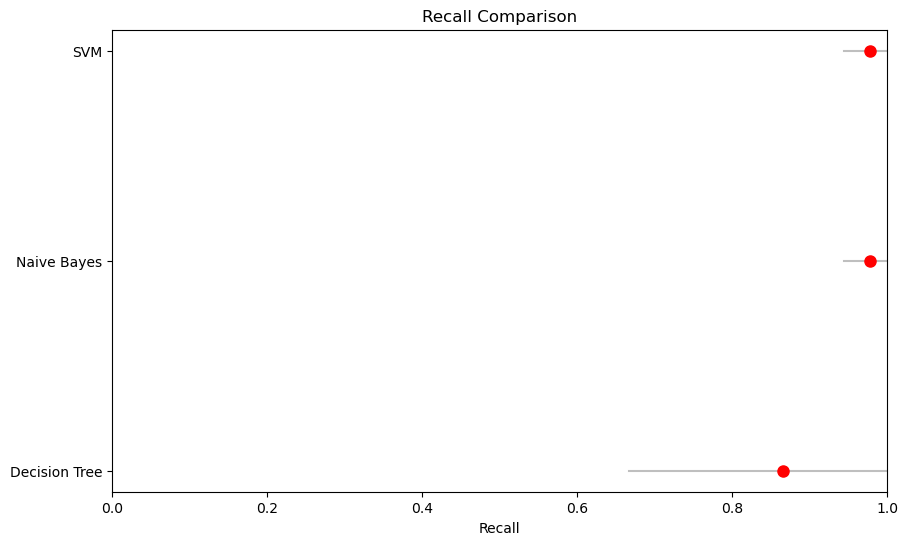

In [150]:
import matplotlib.pyplot as plt

def plot_metric_with_range(plotting_data, metric_name):

    # Position each classifier on the y-axis
    y_pos = np.arange(len(classifiers))
    plt.figure(figsize=(10, 6))

    for i, (mean, range_vals) in enumerate(zip(plotting_data[metric_name]['means'], plotting_data[metric_name]['ranges'])):
        min_val, max_val = range_vals
        plt.plot([min_val, max_val], [i, i], color='gray', linestyle='-', marker='', alpha=0.5) # Range line
        plt.plot(mean, i, 'o', color='red', markersize=8) # Mean circle


    plt.yticks(y_pos, classifiers)
    plt.xlabel(f'{metric_name.capitalize()}') # Use the metric name for x-axis label
    plt.title(f'{metric_name.capitalize()} Comparison')
    plt.xlim(0, 1)

    plt.show()

# Plot each metric with its range and mean for each classifier on the wine dataset
for metric in metrics:
    plot_metric_with_range(wine_plotting_data, metric)

Read in Iris dataset and inspect the data

In [151]:
# Define column names
iris_dataset_column_names = [
    'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'
]

# Read in datasets
iris_dataset = pd.read_csv('./datasets/iris.data', header=None, names=iris_dataset_column_names)

# Inspect the data
print(iris_dataset.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Split data into X features and y labels

In [152]:
# Seperate training features and target variable
iris_X = iris_dataset.drop('class', axis=1) # Drop whole target column from dataset and assign it to X
iris_y = iris_dataset['class'] # Target variable

# Verify number of samples match
print(iris_X.shape)
print(iris_y.shape)


(150, 4)
(150,)


Perform ten fold cross validation for Iris Dataset using Decision Tree

In [153]:
# Initialize decision tree model 
iris_decision_tree = DecisionTreeClassifier(random_state=42)

# Perform ten fold cross validation using decision tree, scoring parameters tells waht metrics we want
iris_decision_tree_scores = cross_validate(iris_decision_tree, iris_X, iris_y, cv=10, scoring=scoring)

# Calculate and display mean and standard deviation of scores for decision tree
print(f"Accuracy: Mean = {np.mean(iris_decision_tree_scores['test_accuracy']):.3f}, Std = {np.std(iris_decision_tree_scores['test_accuracy']):.3f}")
print(f"Precision: Mean = {np.mean(iris_decision_tree_scores['test_precision']):.3f}, Std = {np.std(iris_decision_tree_scores['test_precision']):.3f}")
print(f"Recall: Mean = {np.mean(iris_decision_tree_scores['test_recall']):.3f}, Std = {np.std(iris_decision_tree_scores['test_recall']):.3f}")

Accuracy: Mean = 0.953, Std = 0.043
Precision: Mean = 0.959, Std = 0.040
Recall: Mean = 0.953, Std = 0.043


Perform ten fold cross validation for Naive Bayes

In [154]:
# Initialize Naive Bayes model
iris_naive_bayes = GaussianNB()

# Perform ten-fold cross-validation using Naive Bayes
iris_naive_bayes_scores = cross_validate(iris_naive_bayes, iris_X, iris_y, cv=10, scoring=scoring)

# Calculate and display mean and standard deviation of scores for Naive Bayes
print(f"Accuracy: Mean = {np.mean(iris_naive_bayes_scores['test_accuracy']):.3f}, Std = {np.std(iris_naive_bayes_scores['test_accuracy']):.3f}")
print(f"Precision: Mean = {np.mean(iris_naive_bayes_scores['test_precision']):.3f}, Std = {np.std(iris_naive_bayes_scores['test_precision']):.3f}")
print(f"Recall: Mean = {np.mean(iris_naive_bayes_scores['test_recall']):.3f}, Std = {np.std(iris_naive_bayes_scores['test_recall']):.3f}")


Accuracy: Mean = 0.953, Std = 0.043
Precision: Mean = 0.963, Std = 0.033
Recall: Mean = 0.953, Std = 0.043


Perform ten fold cross validation for SVM

In [155]:
# Create SVM classifer
# Using standard scaling since SVMs are sensitive to unscaled data
iris_svm_classifier = make_pipeline(StandardScaler(), SVC(random_state=42))

iris_svm_classifier_scores = cross_validate(iris_svm_classifier, iris_X, iris_y, cv=10, scoring=scoring)

# Calculate and display mean and standard deviation of scores for Support Vector Machine Classifier
print(f"Accuracy: Mean = {np.mean(iris_svm_classifier_scores['test_accuracy']):.3f}, Std = {np.std(iris_svm_classifier_scores['test_accuracy']):.3f}")
print(f"Precision: Mean = {np.mean(iris_svm_classifier_scores['test_precision']):.3f}, Std = {np.std(iris_svm_classifier_scores['test_precision']):.3f}")
print(f"Recall: Mean = {np.mean(iris_svm_classifier_scores['test_recall']):.3f}, Std = {np.std(iris_svm_classifier_scores['test_recall']):.3f}")

Accuracy: Mean = 0.967, Std = 0.045
Precision: Mean = 0.970, Std = 0.042
Recall: Mean = 0.967, Std = 0.045


Perform same analysis for Iris dataset as for wine

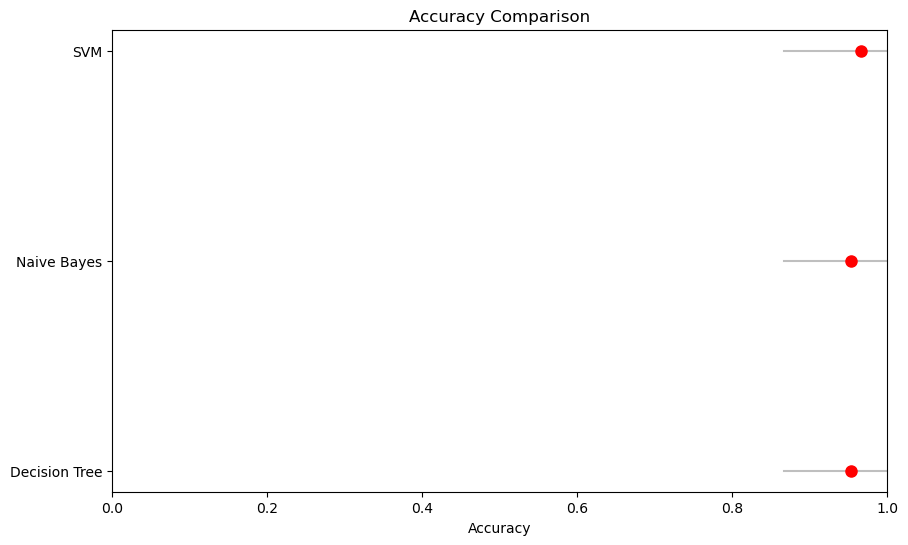

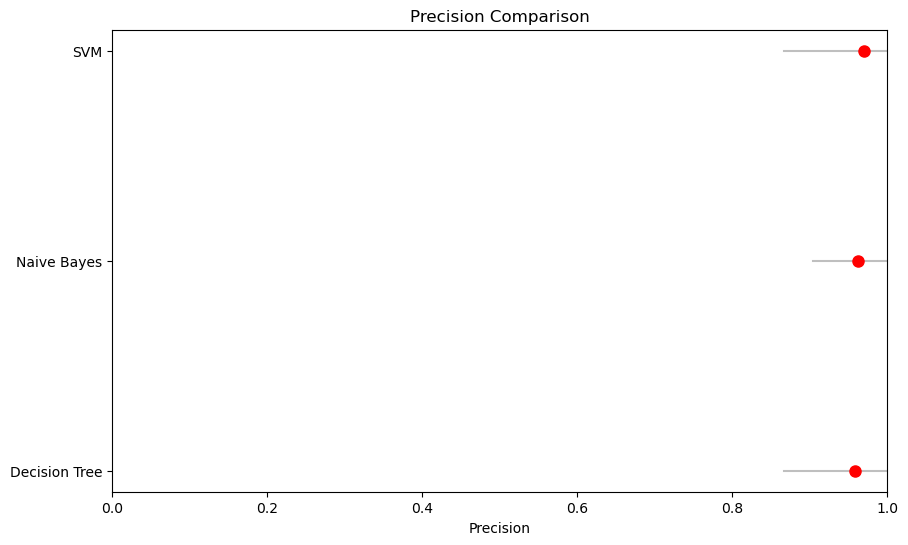

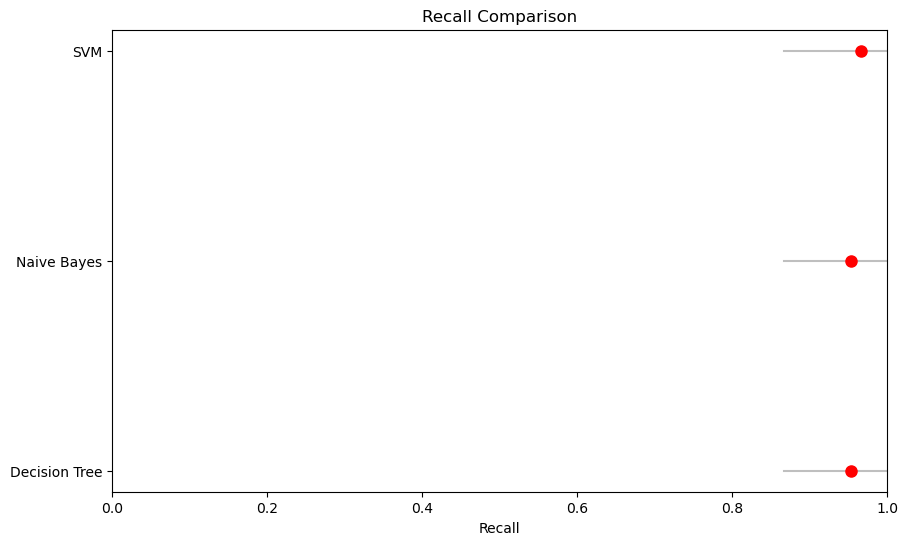

In [156]:
# Extract plotting scores for each classifier for Iris dataset
iris_decision_tree_plotting_scores = extract_plotting_scores(iris_decision_tree_scores)
iris_naive_bayes_plotting_scores = extract_plotting_scores(iris_naive_bayes_scores)
iris_svm_classifier_plotting_scores = extract_plotting_scores(iris_svm_classifier_scores)

# Reformat plotting scores into a data convenient for plotting
iris_plotting_data = format_data(iris_decision_tree_plotting_scores, iris_naive_bayes_plotting_scores, iris_svm_classifier_plotting_scores)

# Plot each metric with its range and mean for each classifier on the Iris dataset
for metric in metrics:
    plot_metric_with_range(iris_plotting_data, metric)

